In [4]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

location_data = read.table(file = '../../data/nCoV2019/for_use/geographic_age.tsv', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(location_data))) {
    location_data[,i] <- as.logical(location_data[,i])
}

# Adjust names
names(location_data) <- gsub("X", "", names(location_data), fixed=TRUE)
names(location_data) <- gsub(".", "-", names(location_data), fixed=TRUE)

head(location_data)

,0-9,10-19,120-129,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
"Abu Dhabi, Abu Dhabi, United Arab Emirates",FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Ada County, Idaho, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
"Adams County, Colorado, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
"Alachua County, Florida, United States",TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
"Alameda County, California, United States",FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Alb-Donau District, Baden-Wurttemberg, Germany",FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


# Convert data frame to binary transaction matrix

In [5]:
location_data_transactions <- as(location_data, "transactions")
summary(location_data_transactions)

transactions as itemMatrix in sparse format with
 245 rows (elements/itemsets/transactions) and
 11 columns (items) and a density of 0.2467532 

most frequent items:
  50-59   60-69   30-39   40-49   20-29 (Other) 
    115      98      96      94      87     175 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11 
119  36  20  26  10   9   9   6   6   3   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.714   4.000  11.000 

includes extended item information - examples:
   labels variables levels
1     0-9       0-9   TRUE
2   10-19     10-19   TRUE
3 120-129   120-129   TRUE

includes extended transaction information - examples:
                               transactionID
1 Abu Dhabi, Abu Dhabi, United Arab Emirates
2           Ada County, Idaho, United States
3      Adams County, Colorado, United States

# Generate rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.965    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 245 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [23 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 23 rules 

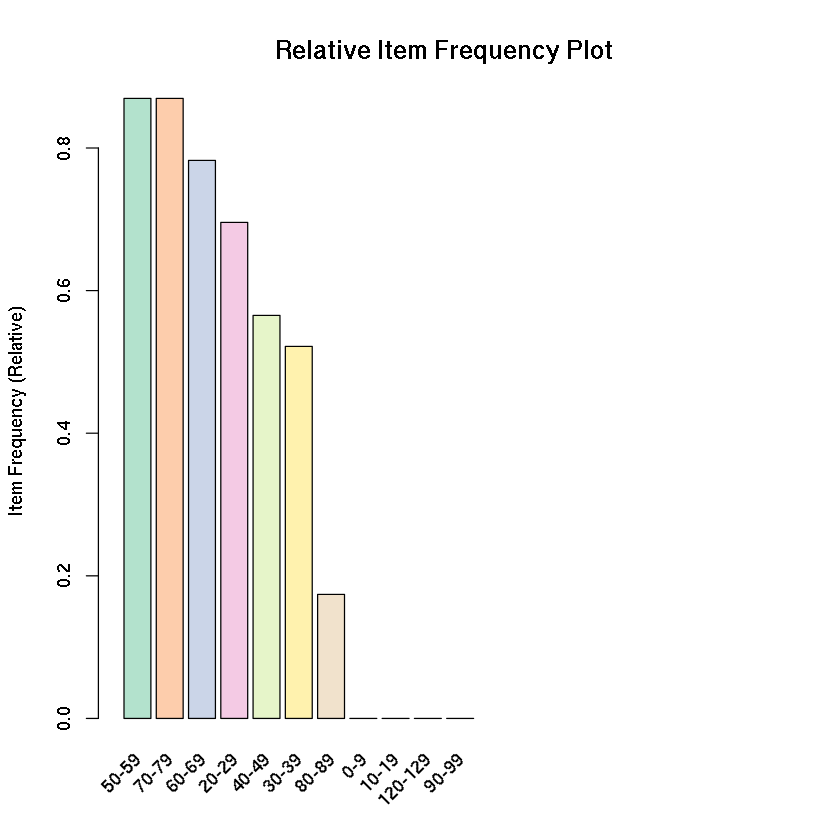

In [21]:
#data(location_data)
location_rules <- apriori(location_data_transactions, parameter=list(support=0.1, confidence=0.965))
location_rules

arules::itemFrequencyPlot(items(location_rules),
    topN=20,
    col=brewer.pal(8,'Pastel2'),
    main='Relative Item Frequency Plot',
    type="relative",
    ylab="Item Frequency (Relative)")

# Scatterplot

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



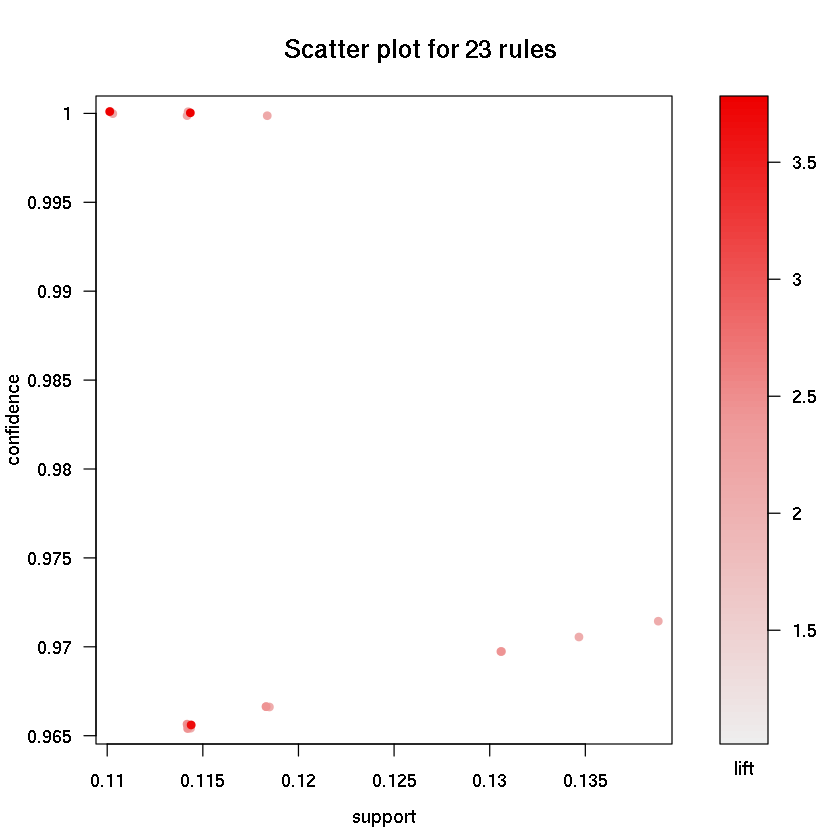

In [22]:
plot(location_rules)

# Graph of sample of dates/locations

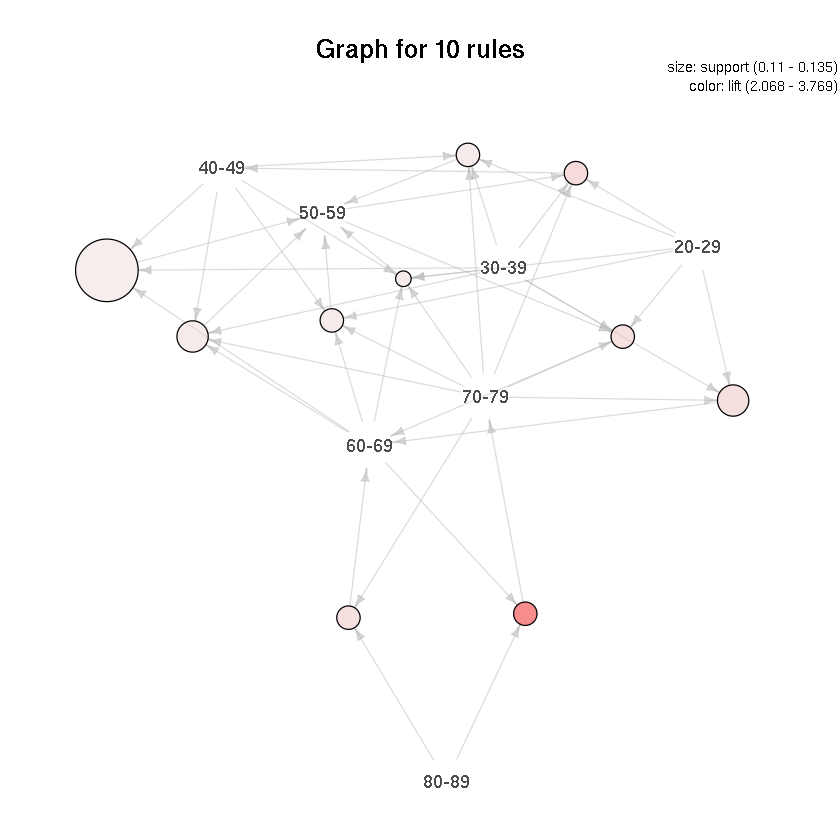

In [23]:
location_rules_sample <- sample(location_rules, 10)
plot(location_rules_sample, method="graph")

# Graph of full set of rules

pdf 
  3

png 
  2

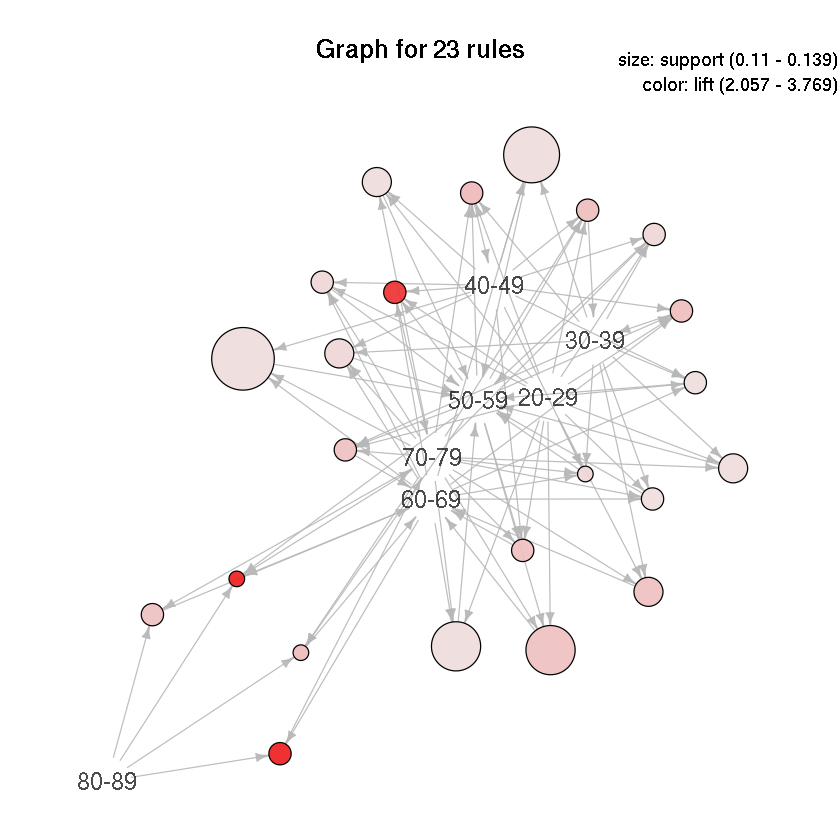

In [26]:
set.seed(2)
plot(location_rules, method="graph", cex=1.3, measure="support", shading="lift", alpha=0.9)
dev.copy(pdf, "geo-age-rules.pdf")
dev.off()

# Interactive viz

In [27]:
set.seed(11)
p <- plot(location_rules, method="graph", measure="support", shading="confidence", engine="htmlwidget")
htmlwidgets::saveWidget(p, "geo-age-rules.html", title="Rules generated from COVID-19 ages divided up by Geographic region",
                        selfcontained = TRUE)
p

HTML widgets cannot be represented in plain text (need html)